In [26]:
%cd drive/MyDrive/novel-seam-carving-method\

[Errno 2] No such file or directory: 'drive/MyDrive/novel-seam-carving-method'
/content/drive/MyDrive/novel-seam-carving-method


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from map_generation_functions import SM_creator, GM_creator, DM_creator
from seam_carving_functions import *
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np
import myvariables
import os

In [32]:
def seam_carving(h_reduction, w_reduction):
  image = cv2.imread(myvariables._orgimg_path)
  input_h = image.shape[0]
  input_w = image.shape[1]
  output_h = input_h - round(h_reduction*input_h/100)
  output_w = input_w - round(w_reduction*input_w/100)
  flag = 0

  new_w = round((input_w*output_h)/input_h)
  new_h = round((input_h*output_w)/input_w)
  if abs(input_h - new_h) > abs(input_w - new_w):
    scaling_h = output_h 
    scaling_w = new_w
  else:
    scaling_h = new_h
    scaling_w = output_w
  delta_h = abs(output_h - scaling_h)
  delta_w = abs(output_w - scaling_w)
  if scaling_h > output_h:
    img = cv2.imread(myvariables._orgimg_path)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(myvariables._orgimg_path, img)

    disp = cv2.imread(myvariables._dispimg_path)
    disp = cv2.rotate(disp, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(myvariables._dispimg_path, disp)

    flag = 1
    delta = delta_h
  elif scaling_h < output_h:
    img = cv2.imread(myvariables._orgimg_path)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(myvariables._orgimg_path, img)

    disp = cv2.imread(myvariables._dispimg_path)
    disp = cv2.rotate(disp, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(myvariables._dispimg_path, disp)

    flag = 1
    out = extend_image(delta_h)
    return out
  if scaling_w > output_w:
    delta = delta_w
  elif scaling_w < output_w:
    out = extend_image(delta_w)
    return out
 
  elist = find_energy_range2(delta)
  elist.sort()
  indexL = round((len(elist)-1)/3)
  indexH = round(2*(len(elist)-1)/3)
  E = (elist[indexH] - elist[indexL])/(indexH - indexL)
  for i in range(indexL, indexH):
    if elist[i + 1] - elist[i] > E:
      break
  
  out = remove_vertical_seams2(i)

  if flag == 1:
    out = cv2.rotate(out, cv2.ROTATE_90_COUNTERCLOCKWISE)

    img = cv2.imread(myvariables._orgimg_path)
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2.imwrite(myvariables._orgimg_path, img)

    disp = cv2.imread(myvariables._dispimg_path)
    disp = cv2.rotate(disp, cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2.imwrite(myvariables._dispimg_path, disp)

  out = cv2.resize(out, (output_w, output_h))  

  return out


In [33]:
out = seam_carving(20,0)

/content/drive/MyDrive/novel-seam-carving-method/GM_src/bdcn.py:199: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(param, 0.080)


In [ ]:
out1 = out.astype(np.uint8)
out1 = cv2.cvtColor(out1, cv2.COLOR_BGR2RGB)
plt.imshow(out1)

/content/drive/MyDrive/novel-seam-carving-method/GM_src/bdcn.py:199: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(param, 0.080)


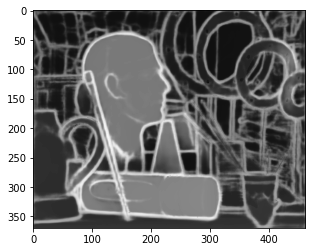

In [8]:
ee = produce_emap()
plt.imshow(ee, cmap='gray')